<a href="https://colab.research.google.com/github/bikash119/learn_tensorflow/blob/main/learn_tf_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import datetime

print(f" TF version : {tf.__version__}")
print(f" Last known execution of the notebook : {datetime.datetime.now()}")

 TF version : 2.12.0
 Last known execution of the notebook : 2023-06-27 00:06:12.394280


Steps in modelling with Tensorflow
1. **Creating a model**: Piece together the layers of a neural network yourself or import a previously built model (known as Transfer Learning ).
2. **Compiling a model** : defining how a models performance should be measured( loss/metrics) as well as defining how it can be improved(optimizer).
3. **Fitting a model** : letting the model try to find patterns in the data.

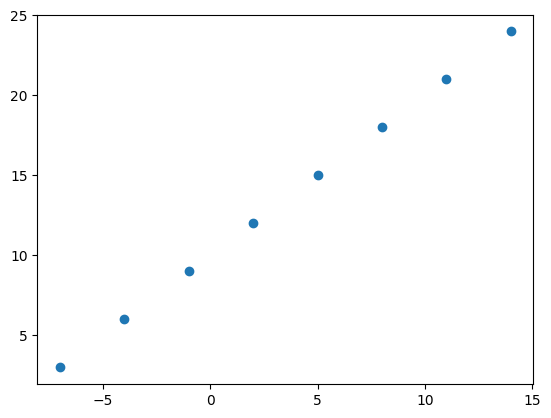

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features ( using tensors )
X = tf.constant([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
# Create labels ( using tensors)
y = tf.constant([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# visualize it
plt.scatter(X,y)

In [3]:
# Set random seed
tf.random.set_seed(42)

#1. creating the model
model = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

#2. Compile the model
model.compile(loss=tf.keras.losses.mae
              ,optimizer = tf.keras.optimizers.SGD()
              ,metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 423ms/step - loss: 10.2728 - mae: 10.2728
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 10.1403 - mae: 10.1403
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 10.0078 - mae: 10.0078
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 9.8753 - mae: 9.8753
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 9.7428 - mae: 9.7428


In [4]:
model.predict([17.0])

1/1 [==============================] - 0s 106ms/step


array([[18.700045]], dtype=float32)

Steps to improving the model
1. _Creating a model_ : Here we might want to add more layers, increase the number of hidden units, change the activation function in each layer.
2. _Compiling a model_: We might want to choose a different optimizer or change the **learning rate** of the optimization function
3. _Fitting a model_ : we could also try fit the model for more **epochs**

_There are many different ways to improve a neural network. Some of the most common include : increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are human-changeable, they are referred to as hyperparameters and the practice of trying to find the best hyperparameters is referred to as hyperparameter-tuning_

In [5]:
# Lets try to improve our model by training it a little longer
# set seeds
tf.random.set_seed(42)

#1.Create the model
model = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)
model.compile (loss= tf.keras.losses.mae
               ,optimizer = tf.keras.optimizers.SGD()
               ,metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 695ms/step - loss: 9.4760 - mae: 9.4760
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 9.3435 - mae: 9.3435
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 9.2110 - mae: 9.2110
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 9.0785 - mae: 9.0785
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 8.9460 - mae: 8.9460
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 8.8135 - mae: 8.8135
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 8.6810 - mae: 8.6810
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 8.5485 - mae: 8.5485
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 8.4160 - mae: 8.4160
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 8.2835 - mae: 8.2835
Epoch 11/100
1/1 [==============================] - 0s 30ms/step - l

In [6]:
model.predict([17.0])

1/1 [==============================] - 0s 309ms/step


array([[29.855291]], dtype=float32)

A typical workflow that we will have to go through while building neural networks is
`build model -> evaluate it -> build (tweak) model -> evaluate it -> build (tweak) model -> evaluate it...`

## Visualize Visuzalize Visualize

1. **The data**
2. **The Model**
3. **The training of the Model**
4. **The prediction of the Model**

In [7]:
# Make a bigger dataset
X = np.arange(-100,100,4)
y = np.arange(-90,110,4)


Split the data into Training , Validation , Test set

In [8]:
#Split the dataset into Training, Validation and Test
len(X)

50

In [9]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train),len(X_test)

(40, 10)

Visualize the train and test data

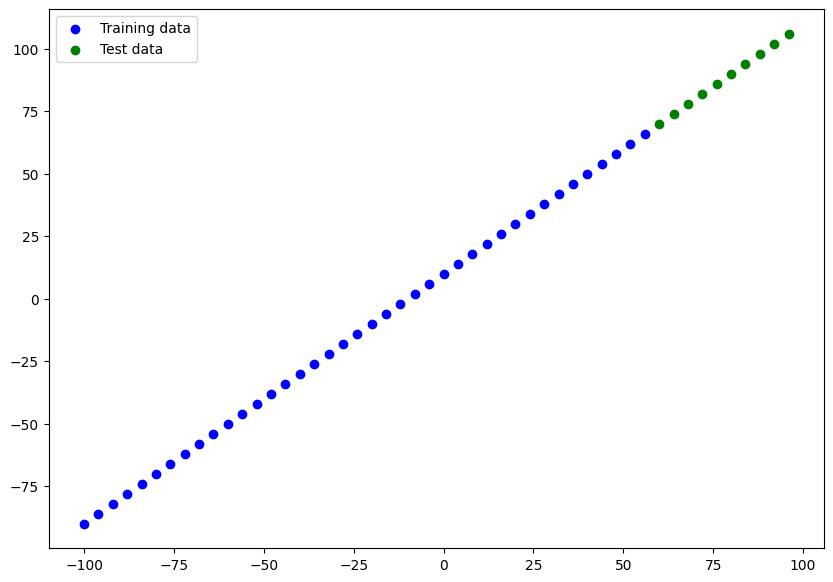

In [10]:
plt.figure(figsize=(10,7))
#plot the training data
plt.scatter(X_train,y_train,c='b',label='Training data')
#plot the test data
plt.scatter(X_test,y_test,c='g',label='Test data')
#show legend
plt.legend();

In [11]:
#Train the model , exactly same as earlier

#set seed
tf.random.set_seed(42)

# create model
#input_shape should be equal to X_train.ndim
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
]
)
# compile the model
model.compile(loss=tf.keras.losses.mae
              ,optimizer=tf.keras.optimizers.SGD()
              ,metrics=["mae"])

#fit the model
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 17ms/step - loss: 33.2863 - mae: 33.2863
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 8.5832 - mae: 8.5832
Epoch 3/100
2/2 [==============================] - 0s 15ms/step - loss: 13.8657 - mae: 13.8657
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 7.5805 - mae: 7.5805
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 11.9902 - mae: 11.9902
Epoch 6/100
2/2 [==============================] - 0s 19ms/step - loss: 9.2768 - mae: 9.2768
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 8.4426 - mae: 8.4426
Epoch 8/100
2/2 [==============================] - 0s 24ms/step - loss: 9.0375 - mae: 9.0375
Epoch 9/100
2/2 [==============================] - 0s 30ms/step - loss: 18.4238 - mae: 18.4238
Epoch 10/100
2/2 [==============================] - 0s 39ms/step - loss: 9.9349 - mae: 9.9349
Epoch 11/100
2/2 [==============================] - 0s 29ms/st

Visualizing the model

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


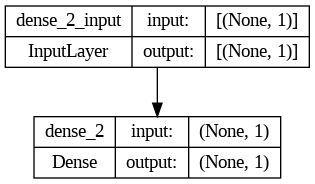

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [14]:
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 138ms/step


array([[44.376244],
       [47.248035],
       [50.119827],
       [52.99162 ],
       [55.86341 ],
       [58.735203],
       [61.60699 ],
       [64.47878 ],
       [67.35058 ],
       [70.22237 ]], dtype=float32)

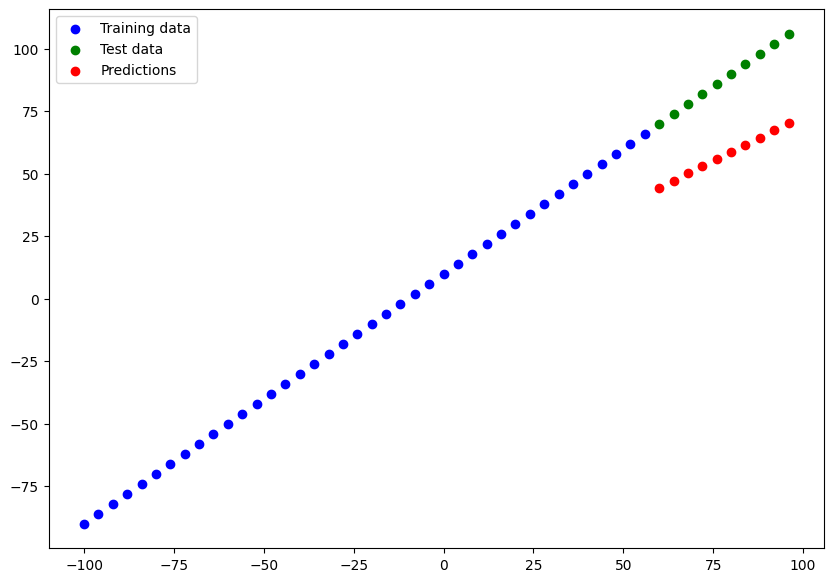

In [15]:
# Function to plot predictions
def plot_predictions(train_data=X_train
                     ,train_label=y_train
                     ,test_data=X_test
                     ,test_label=y_test
                     ,predictions=y_preds):

  plt.figure(figsize=(10,7))

  #Plot the training data
  plt.scatter(train_data,train_label,c='b',label="Training data")
  #Plot the test data
  plt.scatter(test_data,test_label,c='g',label="Test data")
  #Plot the training data
  plt.scatter(test_data,predictions,c='r',label="Predictions")
  #Show legend
  plt.legend();

plot_predictions()

## Evaluate Predictions
Two main metrics for regression problems
1. MAE (Mean Absolute Error) : the mean difference between each of the predictions.
2. MSE (Mean Squared Error) : the squared mean difference between the predictions.

In [16]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 1s 712ms/step - loss: 30.7007 - mae: 30.7007


[30.700693130493164, 30.700693130493164]

In [17]:
mae = tf.metrics.mean_absolute_error(y_true=y_test
                                     ,y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([43.623756, 40.751965, 37.880173, 35.00838 , 32.13659 , 29.264797,
       26.39301 , 23.521217, 20.649422, 17.822107], dtype=float32)>

Since the shape of y_preds & y_test are different, the `tf.metrics.mean_absolute_error` responded with an array, where as we expect a single value


In [18]:
y_test.shape, y_preds.shape

((10,), (10, 1))

In [19]:
y_test.shape, y_preds.squeeze().shape

((10,), (10,))

In [20]:
mae = tf.metrics.mean_absolute_error(y_true=y_test
                                     ,y_pred=y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=30.700693>

In [21]:
mse = tf.metrics.mean_squared_error(y_true=y_test
                                    ,y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=953.0337>

## Running Experiments to improve the model
1. model_1 : Same model architecture trained for 100 epochs
2. model_2 : 2 layers trained for 100 epochs
3. model_1 : 2 layers trained for 500 epochs

In [22]:
#model_1
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae
                ,optimizer=tf.keras.optimizers.SGD()
                ,metrics=['mae'])

model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 16ms/step - loss: 20.7551 - mae: 20.7551
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 10.4669 - mae: 10.4669
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 10.8979 - mae: 10.8979
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 9.4182 - mae: 9.4182
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 10.3060 - mae: 10.3060
Epoch 6/100
2/2 [==============================] - 0s 25ms/step - loss: 9.5512 - mae: 9.5512
Epoch 7/100
2/2 [==============================] - 0s 23ms/step - loss: 8.6707 - mae: 8.6707
Epoch 8/100
2/2 [==============================] - 0s 26ms/step - loss: 9.0477 - mae: 9.0477
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 19.0125 - mae: 19.0125
Epoch 10/100
2/2 [==============================] - 0s 17ms/step - loss: 10.2556 - mae: 10.2556
Epoch 11/100
2/2 [==============================] - 0s 18

1/1 [==============================] - 0s 300ms/step


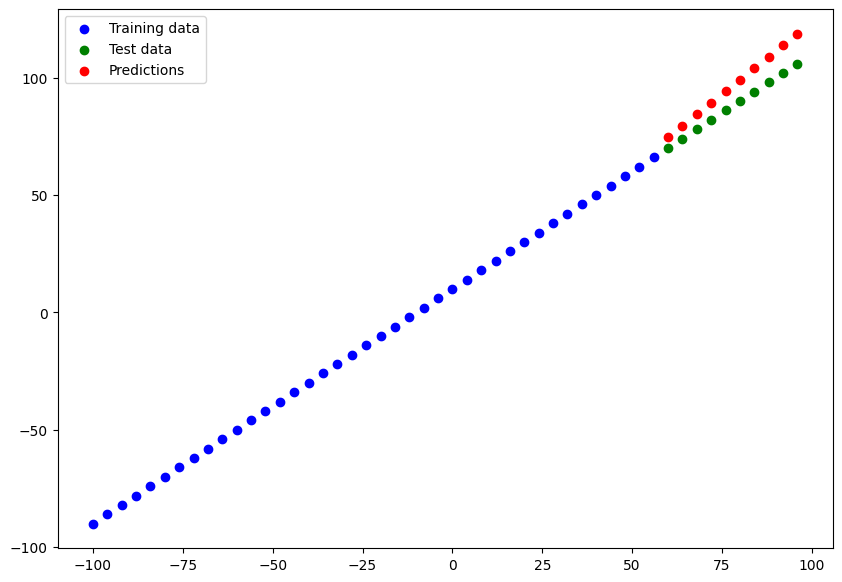

In [23]:
# predict and plot predictions
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [24]:
y_preds_1

array([[ 74.653885],
       [ 79.54394 ],
       [ 84.43399 ],
       [ 89.32404 ],
       [ 94.21409 ],
       [ 99.10414 ],
       [103.994194],
       [108.88424 ],
       [113.77429 ],
       [118.664345]], dtype=float32)

In [34]:
mae_1 = tf.metrics.mean_absolute_error(y_test,y_preds_1.squeeze()).numpy()
mse_1 = tf.metrics.mean_squared_error(y_test,y_preds_1.squeeze()).numpy()
mae_1,mse_1

(8.659116, 81.515854)

In [35]:
#model_2
#Set seed
tf.random.set_seed(42)

#Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ,tf.keras.layers.Dense(1)
])

#Compile model
model_2.compile(loss=tf.keras.losses.mae
                ,optimizer=tf.keras.optimizers.SGD()
                ,metrics=['mae'])

#train the model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

1/1 [==============================] - 0s 97ms/step


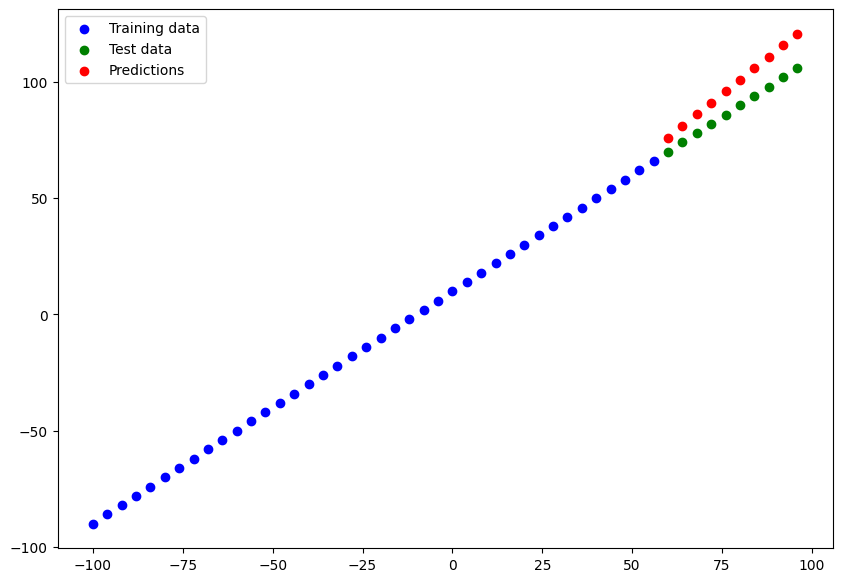

In [36]:
#model_2 predictions and plot_prediction
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [37]:
y_preds_2

array([[ 76.11385 ],
       [ 81.06991 ],
       [ 86.02596 ],
       [ 90.98201 ],
       [ 95.938065],
       [100.89411 ],
       [105.85017 ],
       [110.80621 ],
       [115.76227 ],
       [120.71832 ]], dtype=float32)

In [38]:
mae_2 = tf.metrics.mean_absolute_error(y_test,y_preds_2.squeeze()).numpy()
mse_2 = tf.metrics.mean_squared_error(y_test,y_preds_2.squeeze()).numpy()
mae_2, mse_2

(10.416088, 116.03568)

In [39]:
#model_3
#set seed
tf.random.set_seed(42)

#create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ,tf.keras.layers.Dense(1)
])

#Compile model
model_3.compile(loss=tf.keras.losses.mae
              ,optimizer=tf.keras.optimizers.SGD()
              ,metrics=['mae'])

# train the model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500,verbose=0)

1/1 [==============================] - 0s 59ms/step


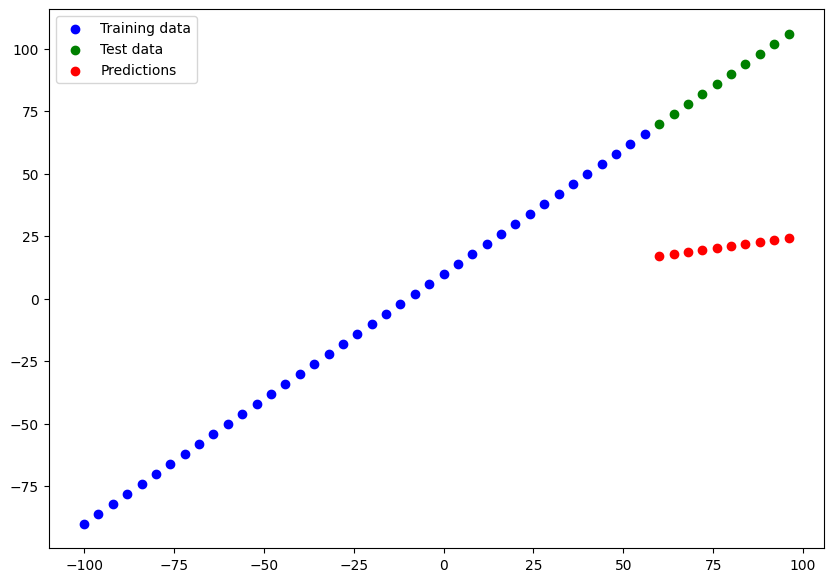

In [40]:
#predict and plot predictions
y_preds_3= model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [41]:
mae_3 = tf.metrics.mean_absolute_error(y_test,y_preds_3.squeeze()).numpy()
mse_3 = tf.metrics.mean_squared_error(y_test,y_preds_3.squeeze()).numpy()
mae_3,mse_3

(67.24667, 4605.0386)

In [42]:
y_preds_3

array([[17.020065],
       [17.84968 ],
       [18.679293],
       [19.508905],
       [20.33852 ],
       [21.168133],
       [21.997747],
       [22.82736 ],
       [23.656975],
       [24.486588]], dtype=float32)

In [43]:
model_results = [
    ["model_1",mae_1,mse_1]
    ,["model_2",mae_2,mse_2]
    ,["model_3",mae_3,mse_3]
]

In [45]:
import pandas as pd
all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,8.659116,81.515854
1,model_2,10.416088,116.035683
2,model_3,67.246674,4605.038574


Save the model
1. `HDF5` format
2. `SavedModelFormat` format


In [46]:
model_2.save("best_model_savedmodelformat")

In [47]:
!ls best_model_savedmodelformat

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [48]:
model_2.save("best_model_hdf5format.h5")

In [50]:
!ls best_model_hdf5format.h5

best_model_hdf5format.h5


Load the model

In [51]:
loaded_saved_model = tf.keras.models.load_model("best_model_savedmodelformat")
loaded_saved_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [52]:
saved_model_preds = loaded_saved_model.predict(X_test)
mae_2== tf.metrics.mean_absolute_error(y_test,saved_model_preds.squeeze()).numpy()

1/1 [==============================] - 0s 111ms/step


True

In [55]:
loaded_hd5_model = tf.keras.models.load_model("best_model_hdf5format.h5")
h5_preds = loaded_hd5_model.predict(X_test)
mae_2 == tf.metrics.mean_absolute_error(y_test,h5_preds.squeeze()).numpy()

1/1 [==============================] - 0s 230ms/step


True